In [134]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.interpolate as si
import scipy.constants as sc
import scipy.optimize as so
import matplotlib as mpl
from matplotlib import cm
import matplotlib.lines as mlines

key="full_width_10"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=6

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

def squarepulse(xin, mu_lst, l, rise):
    y=np.zeros(len(xin))
    for mu in mu_lst:
        for x,i in zip(xin,np.arange(len(xin))):
            if x<mu: 
                y[i]+=0
            if (x>mu) and x<(mu+l): 
                y[i]+=1
            if x>mu+l: 
                y[i]+=0
    return np.clip(np.array(y),0,1);    



/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


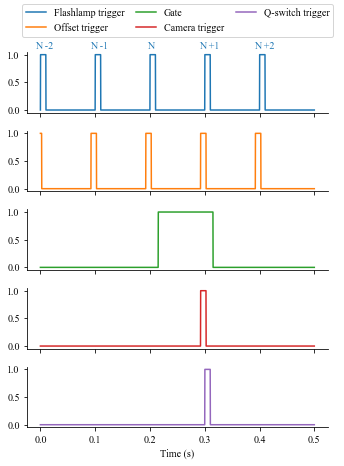

In [139]:
t_max=.5
t_min=0
dt=1E-4

t=np.linspace(0,t_max,t_max/dt)

fig,ax=plt.subplots(5,1,sharex=True)

las_freq=10
cam_freq=10
clk_len=.01

N=10

LasClk=squarepulse(t,np.arange(0,t_max,1/las_freq),clk_len,0)
CamClk=squarepulse(t,np.arange(0,t_max,1/las_freq)-7.7E-3,clk_len,0)
gate=squarepulse(t,[N/las_freq+clk_len+.005-.8],1/las_freq,0)
# LasClk=squarepulse(t,np.arange(0,t_max,t_max/1),.05,0)

allhand=[]
alllab=[]

ax[0].plot(t,LasClk,c='C0',label='Flashlamp trigger')
allhand.append(mlines.Line2D([], [], c='C0',label='Flashlamp trigger'))
for x,i in zip(np.arange(0,t_max,1/las_freq),np.arange(len(np.arange(0,t_max,1/las_freq)))):
    
    Nstr='N {0:+0d}'.format(i-2)
    
    if i-2 == 0: 
        Nstr='N'
        x=x+clk_len/2
        
    ax[0].text(x-clk_len,1.1,Nstr,color='C0')

ax[1].plot(t,CamClk,c='C1',label='Offset trigger')
allhand.append(mlines.Line2D([], [], c='C1',label='Flashlamp trigger'))

ax[2].plot(t,gate,c='C2',label='Gate')
allhand.append(mlines.Line2D([], [], c='C2',label='Gate'))

ax[3].plot(t,np.logical_and(gate,CamClk),c='C3',label='Camera trigger')
allhand.append(mlines.Line2D([], [], c='C3',label='Camera trigger'))

ax[4].plot(t,np.logical_and(gate,LasClk),c='C4',label='Q-switch trigger')
allhand.append(mlines.Line2D([], [], c='C4',label='Q-switch trigger'))
ax[4].set_xlabel('Time (s)')

for ax in ax:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
#     ax.set(ylabel='Voltage (V)')
    handles, labels = ax.get_legend_handles_labels()
    alllab.append(labels)

alllab = [item for sublist in alllab for item in sublist]

lgd=fig.legend(allhand,alllab,ncol=3,bbox_to_anchor=(0.05, 0.98, .95, .102),mode="expand", loc=1)

plt.tight_layout()
plt.savefig('trigger_box_wf.pdf',bbox_inches='tight',bbox_extra_artists=(lgd,))
plt.show()

In [29]:
np.arange(0,t_max,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])